<a href="https://colab.research.google.com/github/andresperez86/Data-Analitys/blob/master/Sem_2/Practicum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum 1: *Ley de los Grandes Números*

### Objetivo:
Este notebook explora la **Ley de los Grandes Números (LGN)** a través de la distribución **exponencial**. Mostraremos cómo, al incrementar el número de observaciones, el promedio de los datos tiende al valor esperado de la distribución.

### Conceptos Claves:
1. **Distribución Exponencial**: Modela eventos que ocurren de manera continua e independiente con una tasa constante.
2. **Ley de los Grandes Números**: A medida que aumentamos el número de muestras $ n $, la media muestral $ \bar{X}_n $ se acerca a la esperanza matemática $ E[X] $.
3. **Visualización**: Representaremos la convergencia del promedio con gráficos para facilitar la comprensión.

> Considere una secuencia de variables aleatorias independientes e
> idénticamente distribuidas (v.a. i.i.d.)  $x_1, \dots , x_n$ con distribución $\varepsilon(\lambda)$, donde $\lambda$ es el parámetro de la distribución exponencial. Luego, para cada $𝑛$ en el rango de $1$ a $3000$, se generan observaciones  $x_1, \dots , x_n$ y se calcula la media muestral:
>
>  >   $$\bar x_n = \frac 1 n \sum_{i=1}^n x_i $$
>
>   Esto equivale a generar una observación de la variable aleatoria:
>
>   $$\bar X_n = \frac 1 n \sum_{i=1}^n X_i$$

---

Sea:

$$X_i \sim \varepsilon(\lambda)$$

Dado que las $𝑋_i$ son variables aleatorias i.i.d. con distribución exponencial
$ε(λ)$, la media y varianza de cada $𝑋_i$ son:

$E[X_i] = \frac 1 \lambda$, $V[X_i] = \frac 1 {\lambda^2}$

Elijo $\lambda = 4$ para todos los experimentos

#### Para *Exponencial*($\lambda$)

[Hint: Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

* ***PDF***:
$$f_X(x) = \lambda e^{-\lambda x}$$

* ***CDF***:
$$F_X(x) = 1 - \lambda e^{-\lambda x}$$

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(10)

def exponential_pdf(lmbda, x):
    return lmbda * np.exp(-lmbda * x)

def exponential_grid(lmbda, desde=0, hasta=2, step=0.1):
    xs = np.arange(desde, hasta + step, step)
    ys = [exponential_pdf(lmbda, x) for x in xs]

    valores = pd.DataFrame({
        'xs': xs,
        'ys': ys
    })

    return valores

lambda_=3 # @param {type:"number"}

grid = exponential_grid(lmbda=4)
print(grid.head())

    xs        ys
0  0.0  4.000000
1  0.1  2.681280
2  0.2  1.797316
3  0.3  1.204777
4  0.4  0.807586


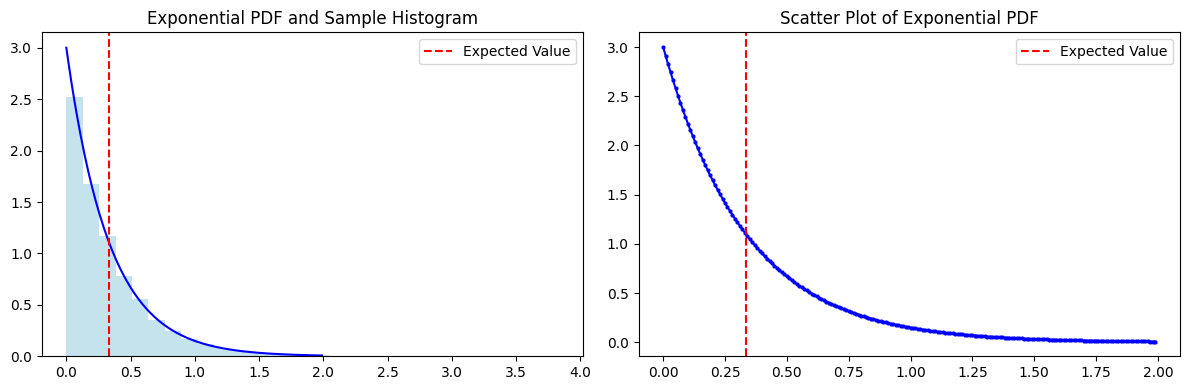

In [15]:
# @markdown ---
# @markdown ### Genera muestras aleatorias siguiendo $\varepsilon(\lambda)$ :
# @markdown ---

lambda_val = lambda_
muestras_de_exponencial = np.random.exponential(scale=1 / lambda_val, size=30000)

# Calculate the expected value
esperanza_exp = 1 / lambda_val

# Create a range of x values for the PDF
x_values = np.arange(0, 2, 0.01)

# Calculate the corresponding PDF values
pdf_values = [exponential_pdf(lambda_val, x) for x in x_values]

# Create a 1x2 grid for plots
plt.figure(figsize=(12, 4))

# Plot the histogram and PDF on the left
plt.subplot(121)
plt.hist(muestras_de_exponencial, bins=30, density=True, color="lightblue", alpha=0.7)
plt.plot(x_values, pdf_values, color="blue")
plt.axvline(x=esperanza_exp, color="red", linestyle="--", label="Expected Value")
plt.legend()
plt.title("Exponential PDF and Sample Histogram")

# Scatter plot on the right
plt.subplot(122)
plt.plot(x_values, pdf_values, marker='o', markersize=2, color="blue")
plt.axvline(x=esperanza_exp, color="red", linestyle="--", label="Expected Value")
plt.legend()
plt.title("Scatter Plot of Exponential PDF")

plt.tight_layout()
plt.show()

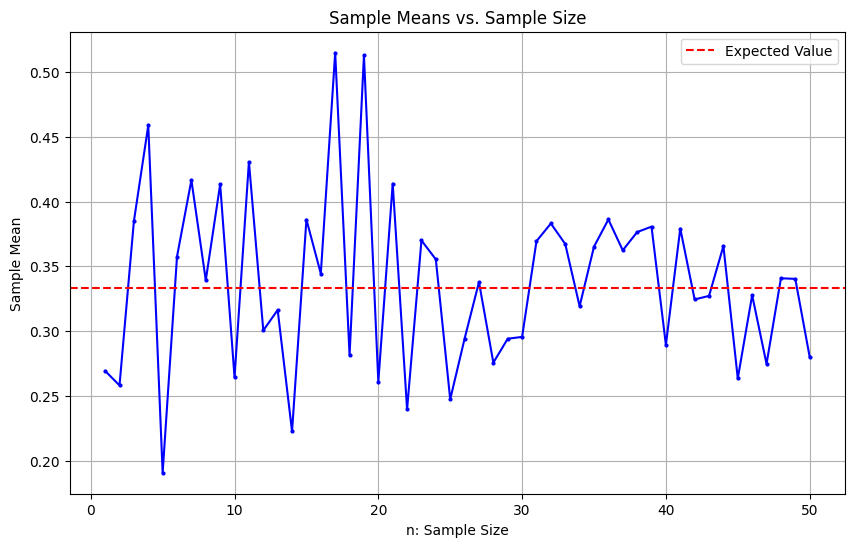

In [19]:
# @markdown ### Determina la media al variar las observaciones :

max_n = 50 # @param {type:"number"}
lambda_val = lambda_

# Initialize an array for storing the averages
promedios = np.zeros(max_n)

# Calculate the averages for different sample sizes
for i in range(1, max_n + 1):
    samples = np.random.exponential(scale=1 / lambda_val, size=i)
    promedios[i - 1] = np.mean(samples)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue")
plt.axhline(y=1 / lambda_val, color="red", linestyle="--", label="Expected Value")
plt.xlabel("n: Sample Size")
plt.ylabel("Sample Mean")
plt.title("Sample Means vs. Sample Size")
plt.legend()
plt.grid()
plt.show()


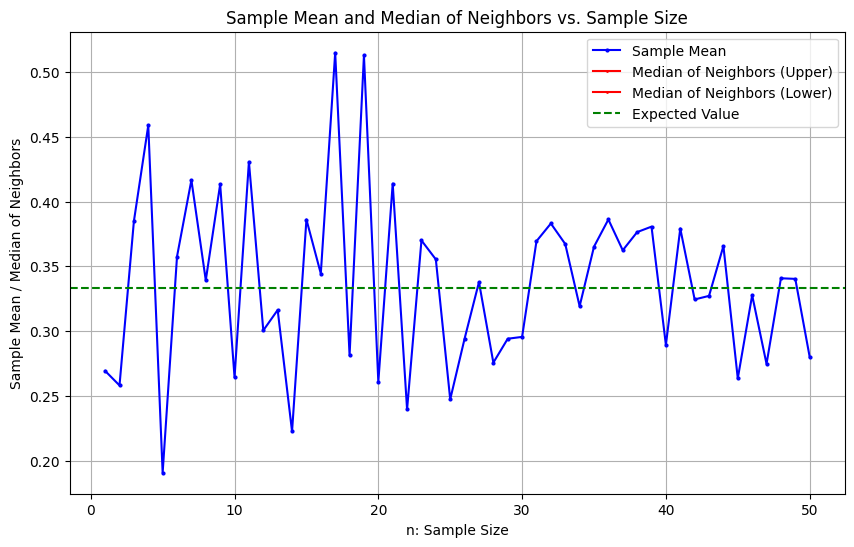

In [20]:
# @markdown ### Determina la mediana al variar las observaciones :

# Parameters
n_veci = 50

# Initialize arrays for storing the medians of neighboring sample means
prom_vecinos_sup = np.zeros(max_n)
prom_vecinos_inf = np.zeros(max_n)

# Calculate the medians for neighboring sample means
rango_reduc = np.arange(n_veci, max_n - n_veci)
for i in rango_reduc:
    vecinos = np.arange(i - n_veci + 1, i + n_veci + 1)
    prom_vecinos_sup[i] = np.median(np.abs(promedios[vecinos] - 1 / lambda_val)) + 1 / lambda_val
    prom_vecinos_inf[i] = np.median(-np.abs(promedios[vecinos] - 1 / lambda_val)) + 1 / lambda_val

promedios_de = {}

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue", label="Sample Mean")
plt.plot(range(n_veci, max_n - n_veci), prom_vecinos_sup[n_veci:max_n - n_veci], marker='o', markersize=1, color="red", label="Median of Neighbors (Upper)")
plt.plot(range(n_veci, max_n - n_veci), prom_vecinos_inf[n_veci:max_n - n_veci], marker='o', markersize=1, color="red", label="Median of Neighbors (Lower)")
plt.axhline(y=1 / lambda_val, color="green", linestyle="--", label="Expected Value")
plt.xlabel("n: Sample Size")
plt.ylabel("Sample Mean / Median of Neighbors")
plt.title("Sample Mean and Median of Neighbors vs. Sample Size")
plt.legend()
plt.grid()
plt.show()

>  ¿Qué observa? ¿A qué se debe?

Se observa que los promedios que se obtienen con distintos $n$ se concentran en la esperanza $E[X_i]$ de la variable aleatoria de la que provienen las muestras:

$$X_i \sim \varepsilon(\lambda=4)$$

Cuya esperanza es

$$E[X_i] = \frac 1 \lambda = \frac 1 4$$

Ésto se debe a la [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros), que demuestra que cualquier variable aleatoria con varianza finita, **convergerá** (en el límite) a su esperanza al promediarse $n$ realizaciones.

> 2. Para apreciar aún un poco más la **Ley de los Grandes Números**, realizar el siguiente experimento:
>
>   **(a)** Considerar dos observaciones $x_1$ y $x_2$ de variables aleatorias $X_1$ y $X_2$ independientes con distribución $\varepsilon(\lambda)$ y **guardar el promedio de ambas**, es decir, $\bar x_2$.
>   
>   Repetir 1000 veces y a partir de los valores obtenidos realizar un ***histograma y un boxplot***.
>
>   ¿Qué características tienen?


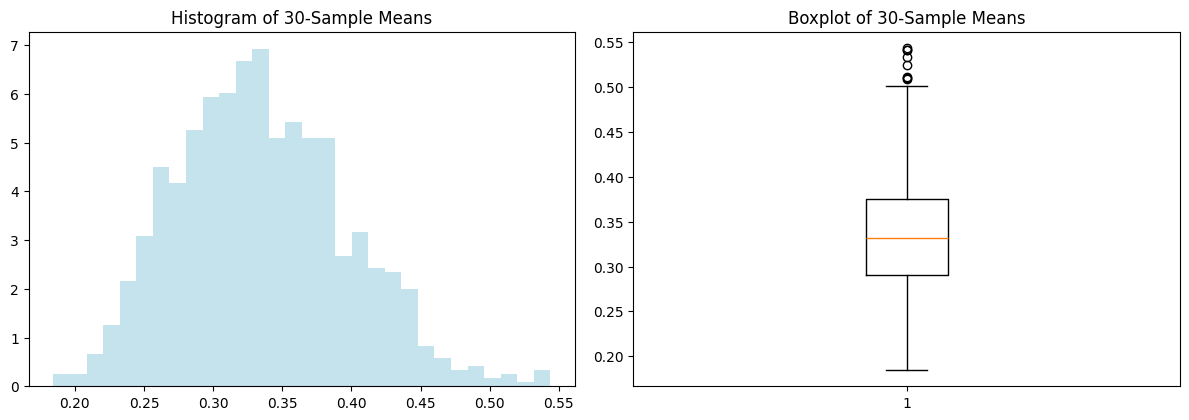

In [23]:
# Parameters
lambda_val = lambda_
cant_exper = 1000 # @param {type:"number"}
n = 30 # @param {type:"number"}

# Initialize an array for storing the means of 2-sample means
promedios_de[str(n)] = np.zeros(cant_exper)

# Calculate the means of 2-sample means
for i in range(cant_exper):
    samples = np.random.exponential(scale=1 / lambda_val, size=n)
    promedios_de[str(n)][i] = np.mean(samples)

# Create a 2x2 grid for plots
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(promedios_de[str(n)], bins=30, density=True, color="lightblue", alpha=0.7)
plt.title("Histogram of {0}-Sample Means".format(n))

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(promedios_de[str(n)])
plt.title("Boxplot of {0}-Sample Means".format(n))

# Show the plots
plt.tight_layout()
plt.show()

>   **(b)** Aumentar a **cinco** las **variables promediadas**, es decir, considerar ahora **n = 5** observaciones de variables aleatorias independientes con la misma distribución del ítem anterior y guardar $\bar x_5$.
>
>   Repetir 1000 veces y realizar un histograma y un boxplot para los valores obtenidos.
>
>   Comparar con los obtenidos en el ítem anterior. ¿Qué se observa?

>   **(c)** Aumentar a n = 30 el número de observaciones de v.a. i.i.d. y repetir el ítem anterior.
>
>   Repetir todo con n = 500.

>   **(d)** Realizar ***boxplots e histogramas*** de los 4 conjuntos de datos en el mismo gráfico.
>
>   ¿Qué pasaría si se siguiera aumentando el tamaño de la muestra?

---

# *Teorema Central del Límite*

>El **Teorema Central del Límite** nos dice que cuando hacemos la siguiente transformación con los promedios:
>
>   $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$
>
>   la **distribución** de esta variable aleatoria se aproxima a la de la normal estándar si $n$ es ***suficientemente grande***.
>
>   Comprobaremos mediante una simulación este resultado.

<ipython-input-34-ce03339200ea>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([transformed_values[n] for n in n_values], labels=n_values)


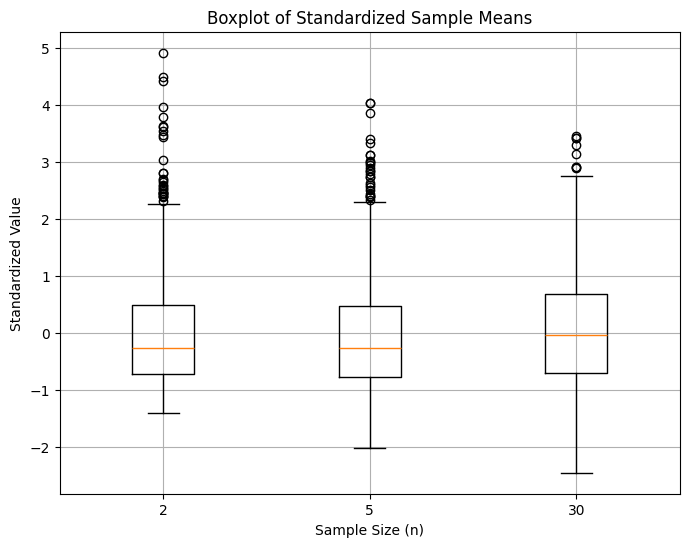

In [34]:
#@markdown **(a)** Realizar la transformación mencionada en los 4 conjuntos de datos
#@markdown y graficar boxplots paralelos.

# Parameters
n_values = [2, 5, 30]

# Initialize arrays for storing the transformed values
transformed_values = {}

# Calculate the standardized values for different sample sizes
for n in n_values:
    promedios = promedios_de[str(n)]
    transformed_values[n] = (promedios - (1 / lambda_val)) / np.sqrt((1 / lambda_val**2) / n)

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([transformed_values[n] for n in n_values], labels=n_values)
plt.title("Boxplot of Standardized Sample Means")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standardized Value")
plt.grid()
plt.show()

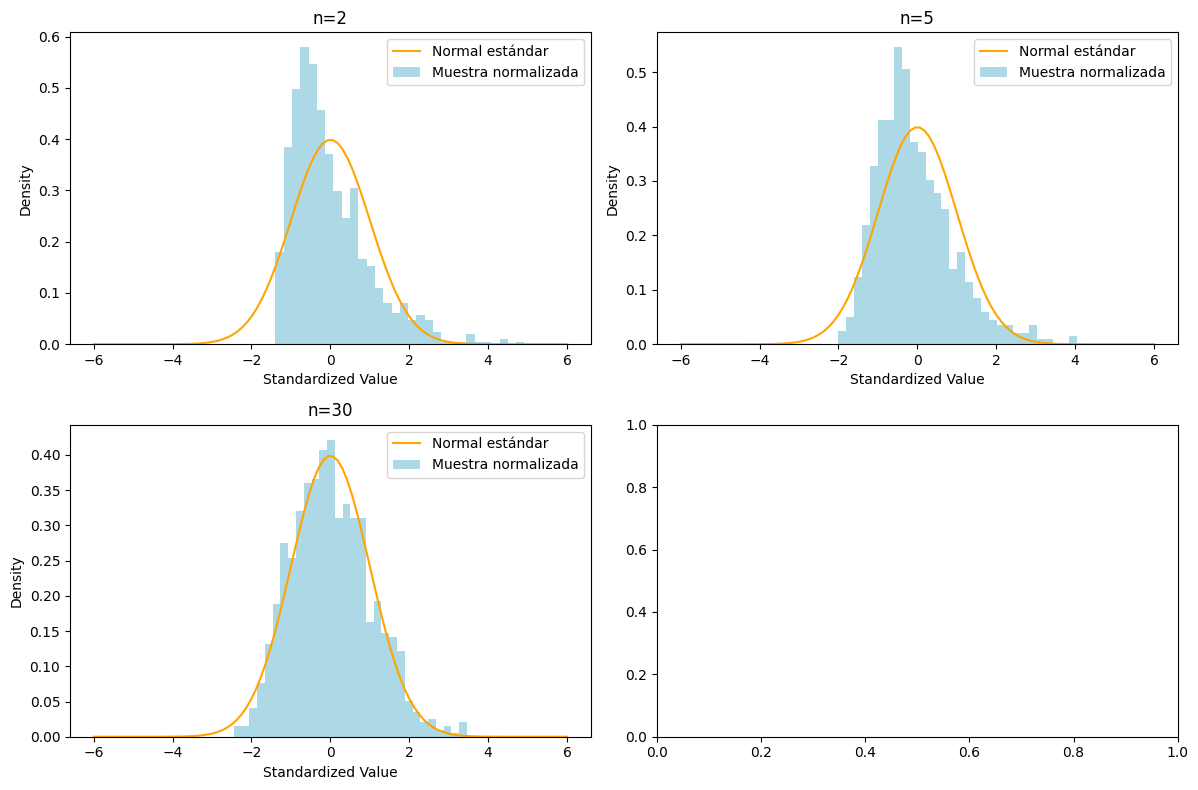

In [36]:
#@markdown **(b)** Realizar **4 histogramas** y a cada uno de ellos superponerle
#@markdown la **densidad de la normal estándar**.

# Parameters
n_values = [2, 5, 30]

# Initialize a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Loop through the sample sizes
for i, n in enumerate(n_values):
    # Calculate the standardized values for the current sample size
    promedios = promedios_de[str(n)]
    transformed_values = (promedios - (1 / lambda_val)) / np.sqrt((1 / lambda_val**2) / n)

    # Create histograms
    ax = axs[i // 2, i % 2]
    ax.hist(transformed_values, bins=30, density=True, color="lightblue")

    # Overlay a standard normal distribution curve
    x = np.linspace(-6, 6, 100)
    ax.plot(x, stats.norm.pdf(x), color="orange")

    # Add legends
    ax.legend(["Normal estándar", "Muestra normalizada"], loc="upper right")

    # Set subplot titles
    ax.set_title(f"n={n}")

    # Set x and y axis labels
    ax.set_xlabel("Standardized Value")
    ax.set_ylabel("Density")

# Show the plots
plt.tight_layout()
plt.show()

Es posible observar como, a pesar de tener variables aleatorias exponenciales con rango entre $0$ y $+\infty$, al normalizar los promedios, obtenemos valores negativos.

**A medida que aumentamos el tamaño de la muestra**, la frecuencia y valores de los promedios obtenidos se asemeja en gran medida a una **distribución Normal estándar**.

> **4.** Repetiremos los ítems anteriores generando ahora muestras de variables aleatorias independientes con distribución $Bi(n, p)$, con $n= 10 $ y $p= \frac{1}{4}$, y con la distribución binomial

> [Hint: Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).

In [38]:
def binomial_pmf(n, p, k):
    return stats.binom.pmf(k, n, p)

def grilla_binomial(n, p, desde=0, hasta=n, step=1):
    xs = np.arange(desde, hasta + step, step)
    ys = [binomial_pmf(n, p, x) for x in xs]

    valores = pd.DataFrame({
        'xs': xs,
        'ys': ys
    })

    return valores

np.random.seed(10)

n = 10 # @param {type:"number"}
p = 0.25 # @param {type:"number"}
n_max = 3000 # @param {type:"number"}

grid = grilla_binomial(n, p)
print(grid.head())

   xs        ys
0   0  0.056314
1   1  0.187712
2   2  0.281568
3   3  0.250282
4   4  0.145998


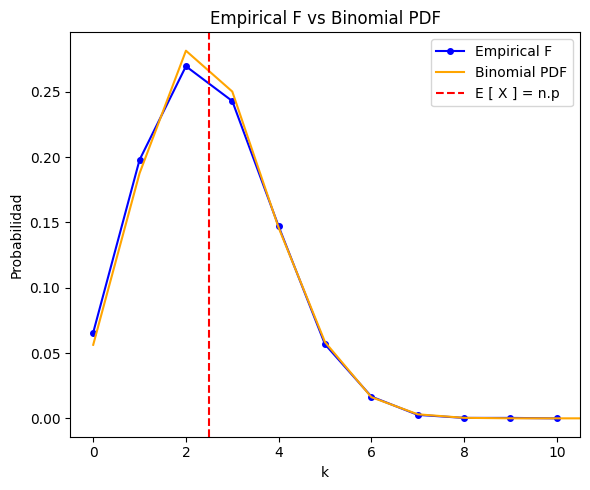

In [39]:
# @markdown ---
# @markdown ### Generar muestras siguiendo $Bi(n, p)$:
# @markdown ---

# Parameters
esperanza_binomial = n * p

# Generate random binomial samples
muestras_de_binomial = np.random.binomial(n, p, size=n_max)

# Calculate counts for each k value
counts = np.zeros(n + 1)
for k in range(n + 1):
    counts[k] = np.sum(muestras_de_binomial == k)

# Normalize frequencies to obtain an empirical probability mass function (PMF)
empirica = counts / n_max

# Create the first plot comparing empirical and binomial PMF
plt.figure(figsize=(6, 5))

plt.plot(range(n + 1), empirica, marker='o', markersize=4, label='Empirical F', color='blue')
plt.plot(grilla_binomial(n, p)['xs'], grilla_binomial(n, p)['ys'], label='Binomial PDF', color='orange')
plt.axvline(esperanza_binomial, color='red', linestyle='--', label='E [ X ] = n.p')
plt.title('Empirical F vs Binomial PDF')
plt.xlabel('k')
plt.ylabel('Probabilidad')
plt.xlim(-0.5,10.5)
plt.legend()

plt.tight_layout()
plt.show()

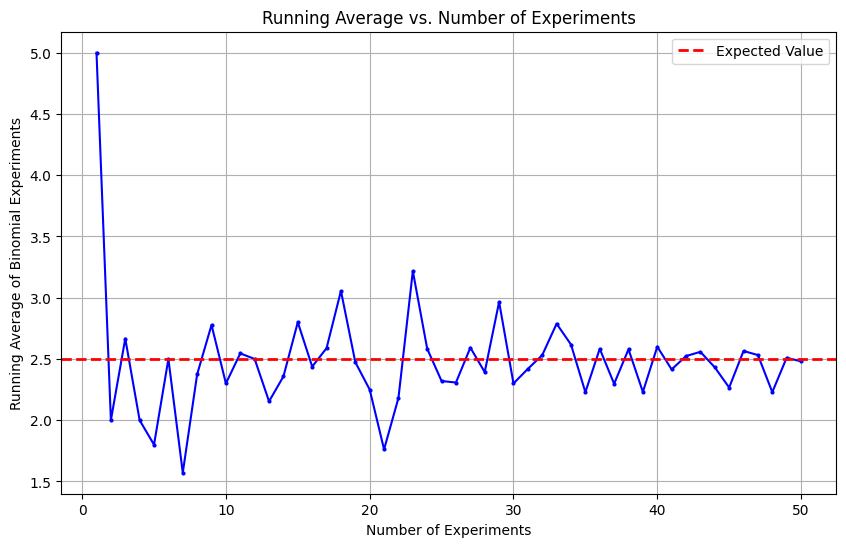

In [40]:
# @markdown ### Determina la media al variar las observaciones :

# Initialize an array for storing the running averages
promedios = np.zeros(max_n)

# Calculate the running averages for different sample sizes
for i in range(1, max_n + 1):
    samples = np.random.binomial(n, p, size=i)
    promedios[i - 1] = np.mean(samples)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), promedios, marker='o', markersize=2, color="blue")
plt.axhline(y=n * p, color="red", linestyle="--", linewidth=2, label="Expected Value")
plt.xlabel("Number of Experiments")
plt.ylabel("Running Average of Binomial Experiments")
plt.title("Running Average vs. Number of Experiments")
plt.legend()
plt.grid()
plt.show()

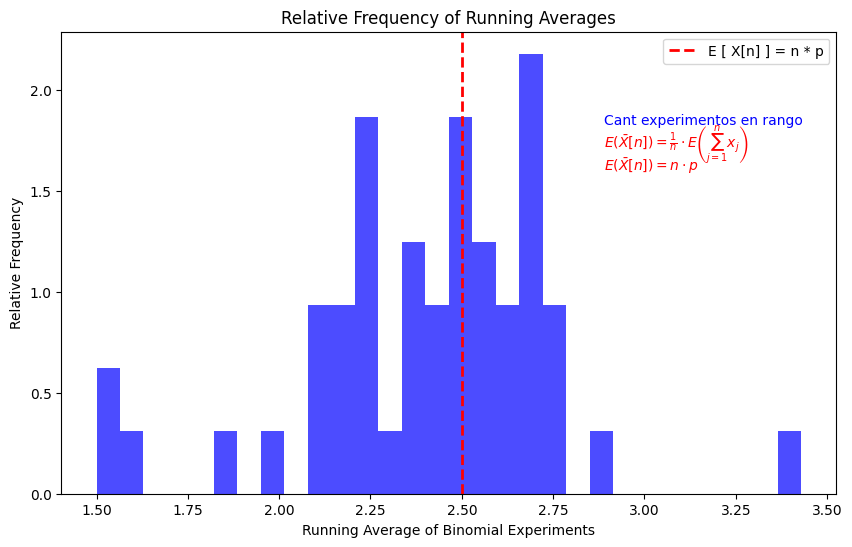

In [41]:
# @markdown ### Determina la frecuencia relativa al variar las observaciones :

# Initialize an array for storing the running averages
promedios = np.zeros(max_n)

# Calculate the running averages for different sample sizes
for i in range(1, max_n + 1):
    samples = np.random.binomial(n, p, size=i)
    promedios[i - 1] = np.mean(samples)

promedios_de = {}

# Create a histogram of running averages
plt.figure(figsize=(10, 6))
plt.hist(promedios, bins=30, color="blue", density=True, alpha=0.7)
plt.axvline(x=n * p, color="red", linestyle="--", linewidth=2, label="E [ X[n] ] = n * p")
plt.xlabel("Running Average of Binomial Experiments")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Running Averages")
plt.legend()

# Add annotations
plt.text(0.7, 0.8, "Cant experimentos en rango", transform=plt.gca().transAxes, color="blue")
plt.text(0.7, 0.75, r'$E(\bar{X}[n]) = \frac{1}{n} \cdot E\left(\sum_{j=1}^{n} x_j\right)$', transform=plt.gca().transAxes, color="red")
plt.text(0.7, 0.7, r'$E(\bar{X}[n]) = n \cdot p$', transform=plt.gca().transAxes, color="red")

plt.show()

>   **(a)** Considerar dos observaciones $x_1$ y $x_2$ de variables aleatorias $X_1$ y $X_2$ independientes con distribución $Bi(n, p)$ y **guardar el promedio de ambas**.
>   
>   Repetir 1000 veces y a partir de los valores obtenidos realizar un ***histograma y un boxplot***.
>
>   ¿Qué características tienen?

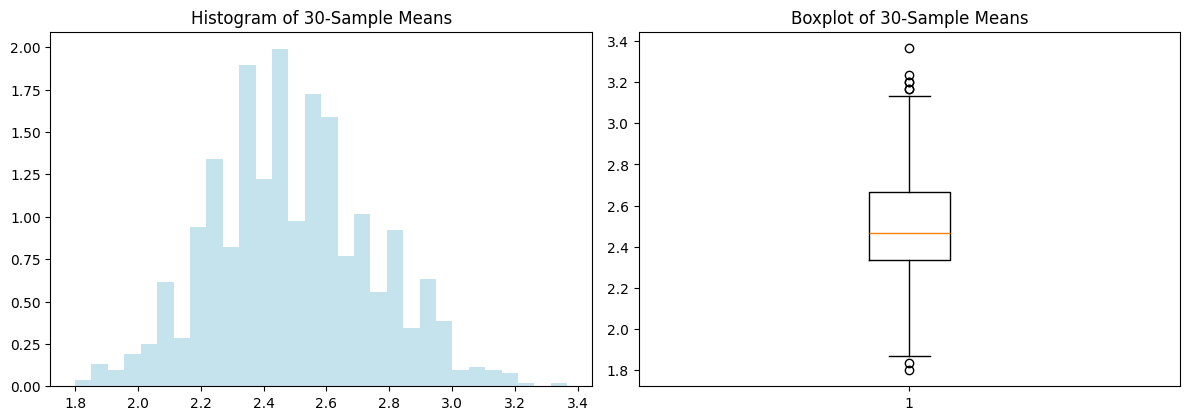

In [45]:
cant_exper = 1000 # @param {type:"number"}
o = 30 # @param {type:"number"}

# Initialize an array for storing the means of 2-sample means
promedios_de[str(o)] = np.zeros(cant_exper)

# Calculate the means of 2-sample means
for i in range(cant_exper):
    samples = np.random.binomial(n, p, size=o)
    promedios_de[str(o)][i] = np.mean(samples)

# Create a 2x2 grid of plots
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(promedios_de[str(o)], bins=30, density=True, color="lightblue", alpha=0.7)
plt.title("Histogram of {0}-Sample Means".format(o))

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(promedios_de[str(o)])
plt.title("Boxplot of {0}-Sample Means".format(o))

# Show the plots
plt.tight_layout()
plt.show()

>   **(b)** Aumentar a **cinco** las **variables promediadas**, es decir, considerar ahora **n = 5** observaciones de variables aleatorias independientes con la misma distribución del ítem anterior y guardar $\bar x_5$.
>   Comparar con los obtenidos en el ítem anterior. ¿Qué se observa?

>   **(c)** Aumentar a n = 30 el número de observaciones de v.a. i.i.d. y repetir el ítem anterior.
>
>   Repetir todo con n = 500.

>Siguiendo el **Teorema Central del Límite**

>   $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$

>   Comprobaremos mediante una simulación este resultado.

<ipython-input-47-86472848f15e>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([transformed_values[str(s)] for s in o_values], labels=o_values)


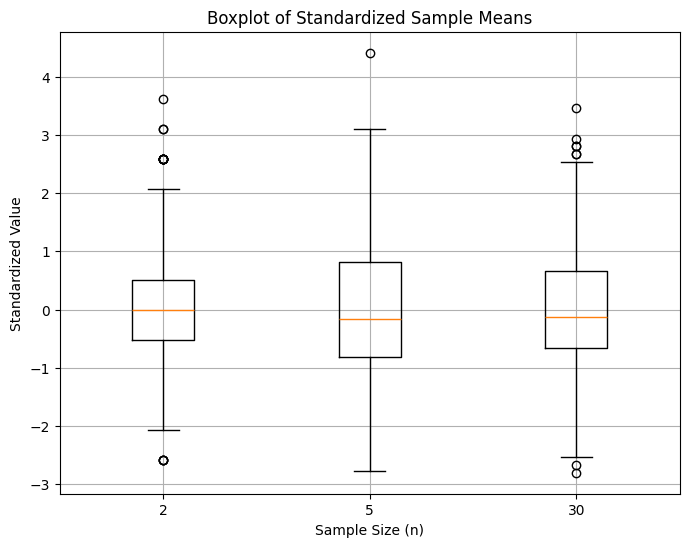

In [47]:
#@markdown **(a)** Transformamos los 4 conjuntos de datos y graficamos los boxplots \
#@markdown ¿Qué pasaría si se siguiera aumentando el tamaño de la muestra?

# Parameters
o_values = [2, 5, 30]

# Initialize arrays for storing the transformed values
transformed_values = {}

# Calculate the transformed values for each sample size
for o in o_values:
    promedios = promedios_de[str(o)]

    # Standardize the values
    mean = n * p
    std_dev = np.sqrt((n * p * (1 - p)) / o)
    transformed_values[str(o)] = (promedios - mean) / std_dev

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([transformed_values[str(s)] for s in o_values], labels=o_values)
plt.title("Boxplot of Standardized Sample Means")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standardized Value")
plt.grid()
plt.show()

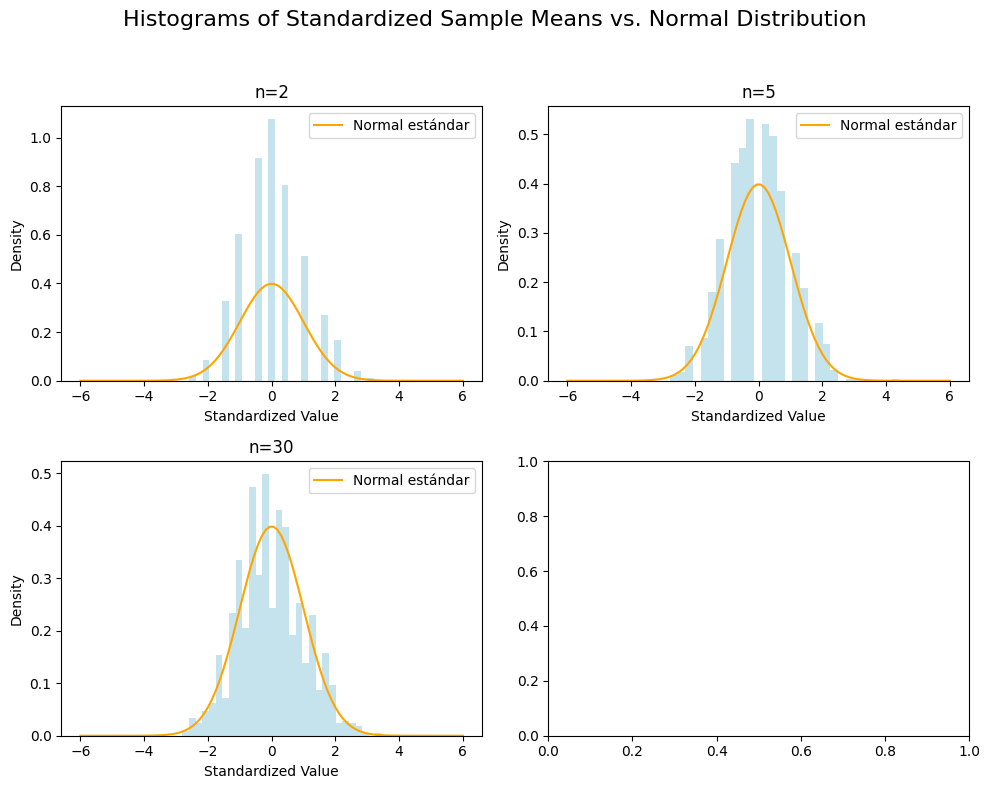

In [49]:
#@markdown **(b)** Realizar **4 histogramas** y a cada uno de ellos superponerle la **densidad de la normal estándar**.

# Standardized sample means for different sample sizes
o_values = [2, 5, 30]

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Histograms of Standardized Sample Means vs. Normal Distribution", fontsize=16)

for i, o in enumerate(o_values):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Histogram for standardized sample means
    ax.hist(transformed_values[str(o)], bins=30, density=True, color="lightblue", alpha=0.7)

    # Plot the standard normal distribution curve
    x_range = np.linspace(-6, 6, 100)
    ax.plot(x_range, stats.norm.pdf(x_range), color="orange", label="Normal estándar")

    # Add legend
    ax.legend(loc="upper right")

    # Set title and labels
    ax.set_title(f"n={o}")
    ax.set_xlabel("Standardized Value")
    ax.set_ylabel("Density")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()